In [1]:
%reload_ext autoreload
%autoreload 2
%run startup.py

ag_ha = attrgetter(*'t v_0 v_c v_1 a_max'.split())
ag = attrgetter(*'x t v_0 v_c v_1 v_max a_max'.split())

def ch(v):
    for e in chain(*v):
        if e is not None:
            yield e

j = Joint(5_000, 50_000)
       
   

In [24]:
j = Joint(5_000, 50_000)
joints = [j]*2

sl = SegmentList(joints)  
x = 1000

sl.move([x,x/4])

b = sl[0][0]
print(b.t)
ss = b.iter_steps()

l= list(ss)
len(l)


0.30006518899294243


75017

<AxesSubplot:xlabel='t'>

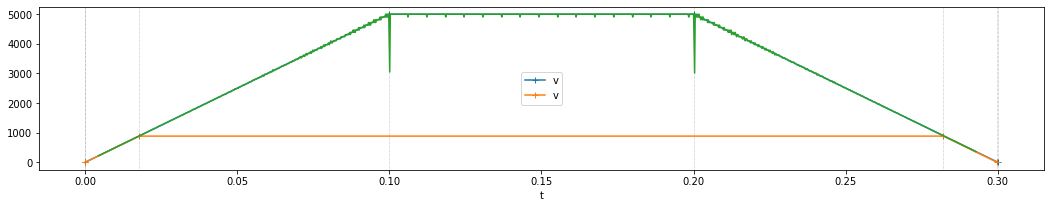

In [29]:
j = Joint(5_000, 50_000)
joints = [j]*2

sl = SegmentList(joints)  
x = 1000

sl.move([x,x/4])

ax = sl.plot()

b = sl[0][0]
t = pd.Series(list(s[1] for s in b.iter_steps()))
#ax = (t.rolling(500).mean()*(250_000)).plot(figsize=(20,3))

# Calculate velocity
x = t.to_frame('step')
x['t'] = 4/1e6
x['t'] = x.t.cumsum()
x = x[x.step==1]
v = (1/x.t.diff()).to_frame('v')
x = x.join(v)
x = x[x.v < 20_000]
x.set_index('t').v.plot(ax=ax)



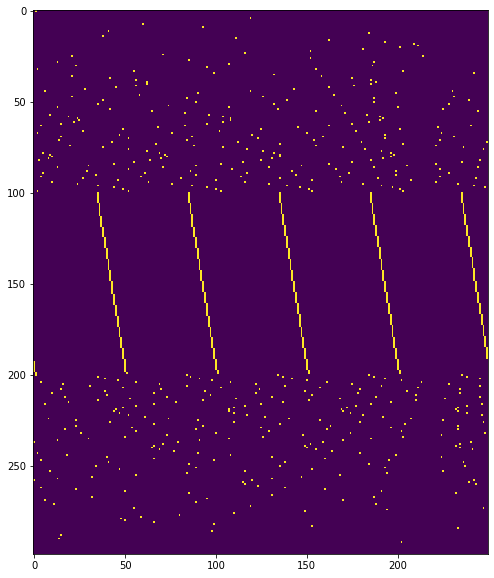

In [50]:
l = 299
last = l*(len(t)//l)
img = t.values[:last].reshape( (l,-1) )

from matplotlib import pyplot as plt
fig,ax = plt.subplots(1, figsize=(10,10))
ax.imshow(img, interpolation='nearest')


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[0.0, 4.2426406871196026e-05, 5.727564927610875e-05, 7.778174593051951e-05, 0.0, 0.0]


0.2501|[0        249↗   750@4998  ↘0       5000] [0        249↗   750@4998  ↘0       5000]
0.2000|[5000      49↗   800@4473  ↘49      5000] [5000       0↗  1000@5000  ↘0       5000]
0.2000|[5000       0↗  1000@5000  ↘0       5000] [5000      99↗   600@3875  ↘99      5000]
0.2000|[5000     149↗   400@3165  ↘149     5000] [5000       0↗  1000@5000  ↘0       5000]
0.2000|[5000       0↗  1000@5000  ↘0       5000] [5000       0↗  1000@5000  ↘0       5000]
0.2501|[5000       0↗   750@4998  ↘249        0] [5000       0↗   750@4998  ↘249        0]

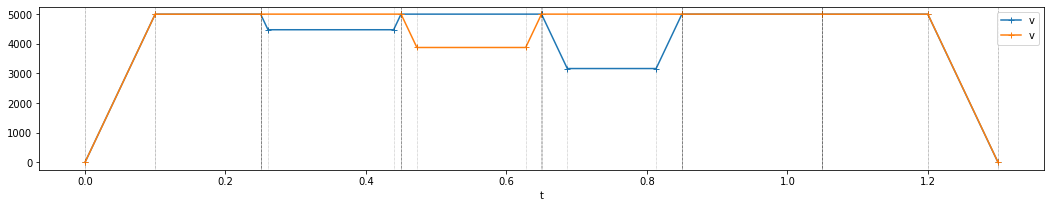

In [83]:
# Too many planning updates for sid=1.
%load_ext autoreload
%autoreload 2
%matplotlib inline
from trajectory.planner import Segment, SegmentList, Joint
from trajectory.gsolver import ACDBlock

j = Joint(5_000, 50_000)
joints = [j]*2

sl = SegmentList(joints)   
s = sl.move([1000,1000])
s = sl.move([900,1000])
s = sl.move([1000,800])
s = sl.move([700,1000])
s = sl.move([1000,1000])
s = sl.move([1000,1000])
sl.plot()
print([s.times_e_rms for  s in sl])
sl

In [81]:
[ (b.v_1-b.v_c) for b in sl.blocks]

[1250.0000000000005,
 -4996.744791666666,
 3210.227272727273,
 -4982.244318181818,
 -4998.046875,
 1.953125,
 0,
 0.0,
 -4996.744791666666,
 -3749.9999999999995]

In [80]:
sl[0,0].t_d

0.02500000000000001

0.25


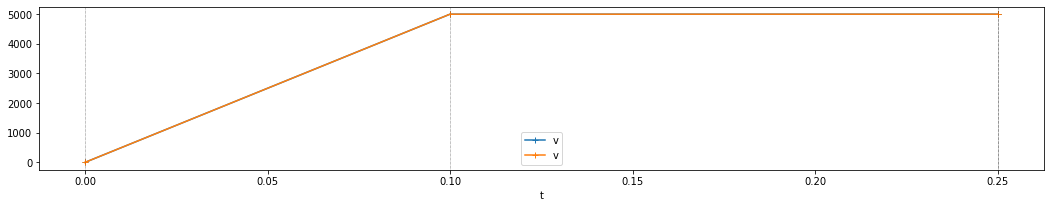

In [48]:
sl[0].set_bv(0,'v_max')
print(sl[0].min_time)
sl[0].plan().plot()


In [3]:
sl[1].v_0

[5000, 0]

0.16


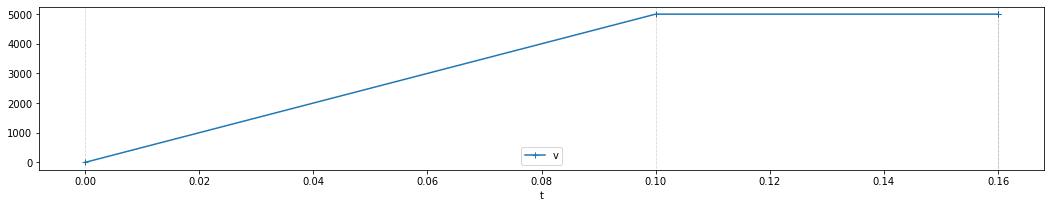

In [7]:
a = ACDBlock(joint=j, x=550).init(v_0 = 0, v_1 = 5000)
print(a.t)
a.plot()



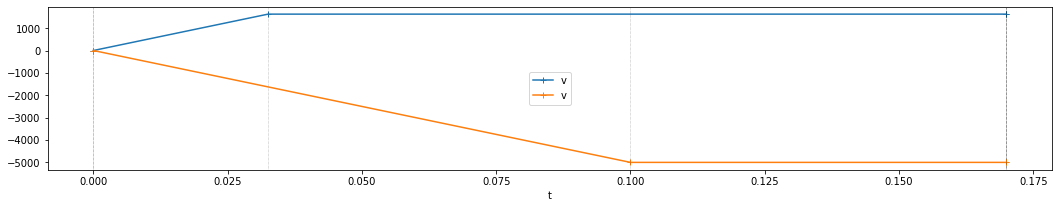

In [12]:

s0 = Segment(0, [250,-600], joints)
s0.init(v_1='v_max').plan_ramp()
s0.plot()

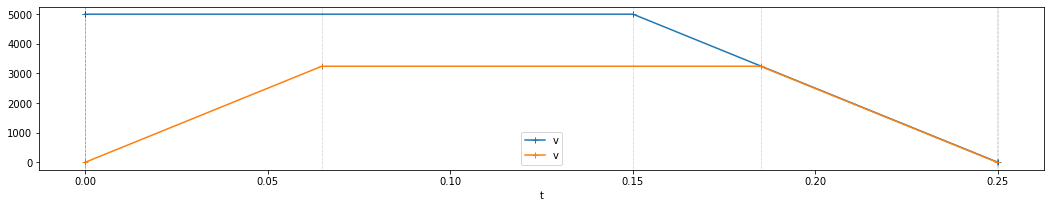

In [10]:
s1 = Segment(0, [1000,600], joints, s0)
s1.init(v_0='prior', prior=s0).plan()
s1.plot()

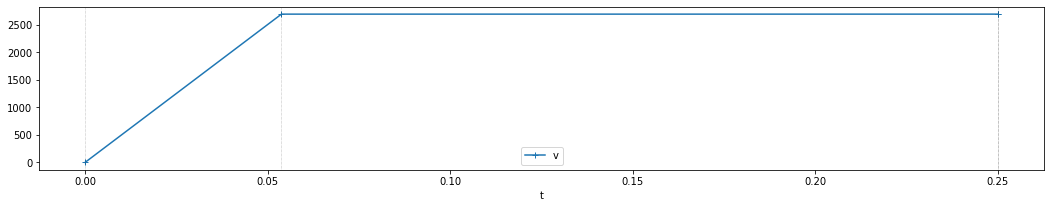

In [243]:
s0[1].plan_ramp(s0.time).plot()

In [34]:
b = ACDBlock(x=100, joint=j).init()
b.v_c, b.t, b.min_time()

!!!! 2236.06797749979
!!!Z 2236.06797749979


(2236.06797749979, 0.08944271909999159, 0.08944271909999159)

In [28]:
str(b)

'ACDBlock(x=1, t=0.00894427190999916, t_a=0.004472135954999579, t_c=4.965068306494546e-19, t_d=0.004472135954999579, x_a=0.49999999999999994, x_c=1.1102230246251565e-16, x_d=0.49999999999999994, v_0=0, v_c=223.60679774997897, v_1=0, d=1, joint=Joint(v_max=5000, a_max=50000, small_x=250.0, max_discontinuity=10.0, max_at=0.1), segment=None, recalcs=0, step_period=4)'